<font size="4">**Context**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<font size="4">**Data Description**

**Train Data**

| Columns | Definition |
| :- | :-- |
| id | Unique ID for the customer |
| Gender | Gender of the customer |
| Age | Age of the customer |
| Driving_License | 1 : Customer already has DL <br> 0 : Customer does not have DL |
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance <br> 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past <br> 0 : Customer didn't get his/her vehicle damaged in the past |
|Annual_Premium | The amount customer needs to pay as premium in the year |
| PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage | Number of Days, Customer has been associated with the company |
| Response | 1 : Customer is interested  <br> 0 : Customer is not interested |

**Test Data**

| Columns | Definition |
| :- | :-- |
| id | Unique ID for the customer |
| Gender | Gender of the customer |
| Age | Age of the customer |
| Driving_License | 1 : Customer already has DL <br> 0 : Customer does not have DL |
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance <br> 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past <br> 0 : Customer didn't get his/her vehicle damaged in the past |
|Annual_Premium | The amount customer needs to pay as premium in the year |
| PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage | Number of Days, Customer has been associated with the company |

**Submission**

| Variable | Definition |
| :-- | :-- |
| id | Unique ID for the customer |
| Response | 1 : Customer is interested <br> 0 : Customer is not interested |

<font size= 2>Source: [Kaggle](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction)

<font size="4">**My Code**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv', index_col = 'id')

In [3]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [5]:
df_train = df_train.astype({'Driving_License': object,
                            'Region_Code': object,
                            'Previously_Insured': object,
                            'Vehicle_Damage': object,
                            'Policy_Sales_Channel': object,
                            'Response': object})

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  object 
 3   Region_Code           381109 non-null  object 
 4   Previously_Insured    381109 non-null  object 
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  object 
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 34.9+ MB


<font size="3">**Check Missing Value**

In [7]:
df_train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<font size="3">**Exploratory Data Analysis**

In [8]:
df_train.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


**Define function for plotting data**

In [9]:
def countplot(data, xlabel, ylabel, title):
    sns.set(rc={'figure.figsize':(15,2)})
    sns.set_palette("Set2")
    plot = sns.countplot(y = data, data = df_train)
    plot.set(ylabel = ylabel, xlabel = xlabel, title = title)
    
    for p in plot.patches:
        height = p.get_height()
        width = p.get_width()
        plot.text(x = width + 2000,
                  y = p.get_y() + (height/2),
                  s = '{:.0f}'.format(width),
                  va = 'center')
    plt.show()

In [10]:
def countplot2(data, hue, xlabel, ylabel, title):
    sns.set(rc={'figure.figsize':(15,2)})
    sns.set_palette("Set2")
    plot = sns.histplot(y = data, data = df_train, hue = hue, multiple = 'fill')
    plot.set(ylabel = ylabel, xlabel = xlabel, title = title)
    
    plt.show()

**Distribution graphs of columns**

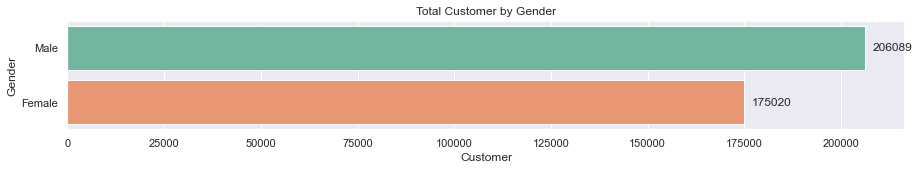

In [11]:
countplot(data = df_train['Gender'],
          xlabel = 'Customer',
          ylabel = 'Gender',
          title = 'Total Customer by Gender')

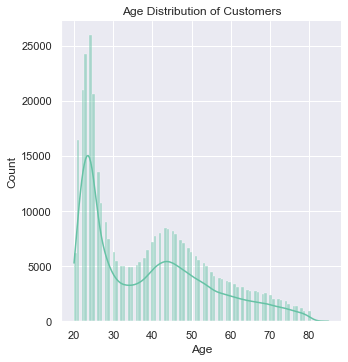

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_palette("Set2")

age_plot = sns.displot(data = df_train['Age'], kde = True)
age_plot.set(xlabel = 'Age', title = 'Age Distribution of Customers')

plt.show()

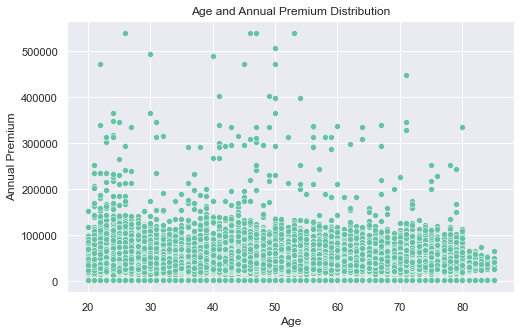

In [13]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_palette("Set2")

age_premium_plot = sns.scatterplot(x = df_train['Age'], y = df_train['Annual_Premium'])
age_premium_plot.set(xlabel = 'Age', ylabel = 'Annual Premium', title = 'Age and Annual Premium Distribution')

plt.show()

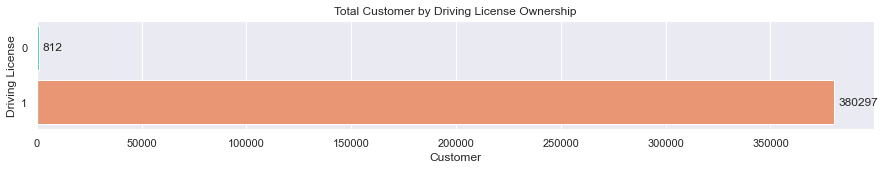

In [14]:
countplot(data = df_train['Driving_License'],
          xlabel = 'Customer',
          ylabel = 'Driving License',
          title = 'Total Customer by Driving License Ownership')

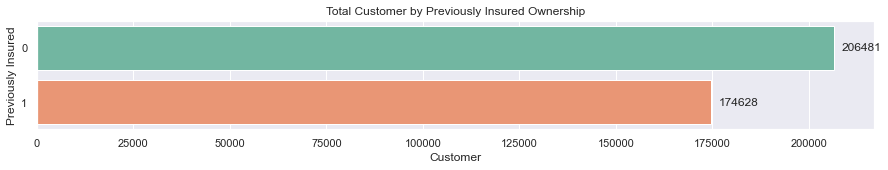

In [15]:
countplot(data = df_train['Previously_Insured'],
          xlabel = 'Customer',
          ylabel = 'Previously Insured',
          title = 'Total Customer by Previously Insured Ownership')

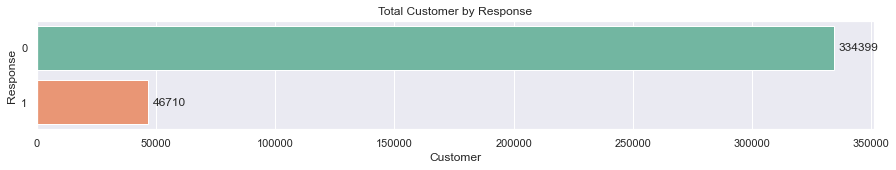

In [16]:
countplot(data = df_train['Response'],
          xlabel = 'Customer',
          ylabel = 'Response',
          title = 'Total Customer by Response')

**Vehicle Age and Vehicle Damage**

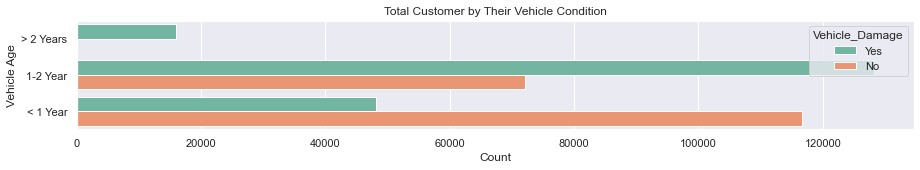

In [25]:
sns.countplot(y = 'Vehicle_Age',
              data = df_train,
              hue = 'Vehicle_Damage').set(
    xlabel = 'Count',
    ylabel = 'Vehicle Age',
    title = 'Total Customer by Their Vehicle Condition')

plt.show()

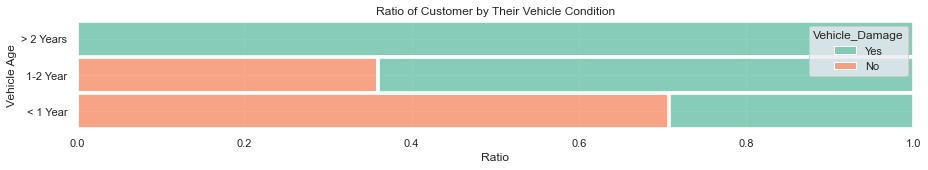

In [18]:
countplot2(data = df_train['Vehicle_Age'],
           hue = df_train['Vehicle_Damage'],
           xlabel = 'Ratio',
           ylabel = 'Vehicle Age',
           title = 'Ratio of Customer by Their Vehicle Condition')

**Vehicle Damage and Response**

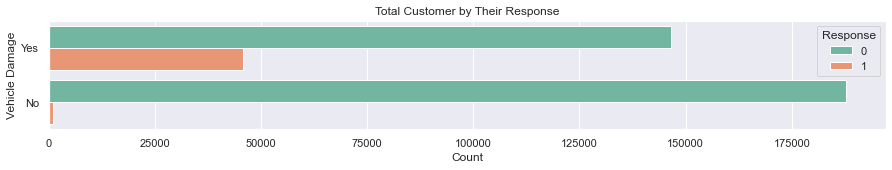

In [26]:
sns.countplot(y = 'Vehicle_Damage',
              data = df_train,
              hue = 'Response').set(
    xlabel = 'Count',
    ylabel = 'Vehicle Damage',
    title = 'Total Customer by Their Response')

plt.show()

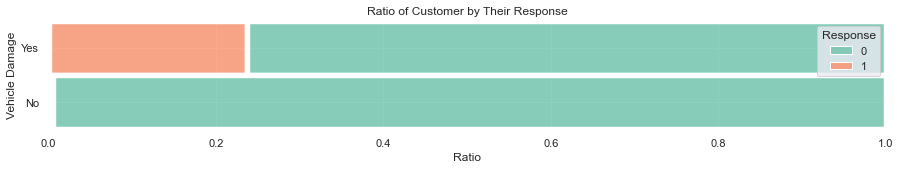

In [20]:
countplot2(data = df_train['Vehicle_Damage'],
           hue = df_train['Response'],
           xlabel = 'Ratio',
           ylabel = 'Vehicle Damage',
           title = 'Ratio of Customer by Their Response')